#### Detecting SMS spam

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

#### Import SMS Data

In [2]:
df=pd.read_csv('spamraw.csv')

In [3]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


#### Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [5]:
#Extract SPAM messages
spam_messages=df[df['type']=='spam']
spam_messages.head() #Display first 5 rows of SPAM messages

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [6]:
#Find count and unique messages count of SPAM messages
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


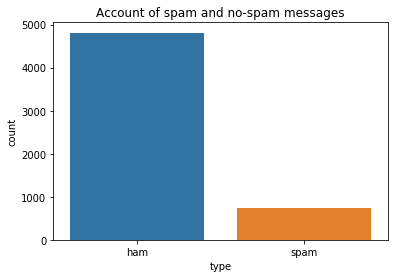

In [7]:
#Plot the counts of HAM(non SPAM)vs SPAM
sns.countplot(data=df,x=df['type']).set_title('Account of spam and no-spam messages')
plt.show()

#### Splitting the SMS data into Test and Train data

In [10]:
data_train,data_test,labels_train,labels_test=train_test_split(df.text,df.type,test_size=0.2,random_state=0)
print("data_train,labels_train:",data_train.shape,labels_train.shape)
print("data_test,labels_test:",data_test.shape,labels_test.shape)

data_train,labels_train: (4447,) (4447,)
data_test,labels_test: (1112,) (1112,)


#### Extraction and CountVectorize
The CountVectorizer provides a simple way to both tokenize a collection
of text documents and build a vocabulary of known words but also to encode
new documents using that vocabulary.

In [11]:
vectorizer=CountVectorizer()
#fit & transform
data_train_count=vectorizer.fit_transform(data_train)
data_test_count=vectorizer.transform(data_test)

#### Modeling and Training

Multinomial Naive Bayes is specialized version of Naive Bayes that is 
designed more for text documents, Whereas simple naive Bayes would model a
document as the presence and absence of particular words,multinomial naive bayes explicitly
models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes Theorem with an assumption of independence among 
predications, in simple terms, a Naive Bayes classifier that the presence of a particular feature in a class
is unrelated to the presence of any other feature.

In [12]:
clf=MultinomialNB()

In [13]:
clf.fit(data_train_count,labels_train)
predications=clf.predict(data_test_count)
predications

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

#### Results and Accuracy

In [14]:
print("Accuracy_score: ",accuracy_score(labels_test,predications))

Accuracy_score:  0.9901079136690647


#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance
of a classification model for(or 'classifier') on a set of test data
for which the true values are known. It allows the visualization of the performance
of an algorithm.

In [15]:
print("Confusion_matrix: \n",confusion_matrix(labels_test,predications))

Confusion_matrix: 
 [[979   0]
 [ 11 122]]


In [16]:
print(classification_report(labels_test,predications))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       979
        spam       1.00      0.92      0.96       133

   micro avg       0.99      0.99      0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

